# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

In [2]:
houses = pd.read_csv("/kaggle/input/ames-housing/Ames_Housing_Data1.tsv" , sep = "\t")
houses.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [4]:
houses.shape

(2931, 82)

In [5]:
houses.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2931.000000,2.931000e+03,2931.000000,2441.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2908.000000,...,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000
mean,1465.000341,7.144003e+08,57.374616,69.253994,10155.298874,6.094848,5.562948,1971.352439,1984.258274,101.900275,...,93.791539,47.538383,23.003753,2.591607,15.996588,2.242579,50.617878,6.215626,2007.791198,180807.729785
std,846.250554,1.887306e+08,42.636341,23.405675,7888.789128,1.410786,1.111396,30.240926,20.861542,179.081899,...,126.358242,67.472412,64.129522,25.137086,56.078577,35.591130,566.248407,2.714122,1.317021,79875.557267
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,732.500000,5.284770e+08,20.000000,58.000000,7440.500000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.000000,5.354532e+08,50.000000,68.000000,9439.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.500000,9.071811e+08,70.000000,80.000000,11556.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Data Cleaning And Preprocessing

## Hundle Duplicates

In [6]:
dupl = houses[houses.duplicated(subset = "PID")]
dupl

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [7]:
houses = houses.drop_duplicates(subset = "PID")
houses.duplicated(subset = "PID").sum()

0

## Hundle Missing Values

In [8]:
null_values = houses.isnull().sum().sort_values(ascending = False)
null_values = null_values[null_values > 0]
null_values

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

In [9]:
null_per = null_values / houses.shape[0] * 100
null_per

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Qual        5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
BsmtFin SF 1       0.034130
Garage Cars        0.034130
Electrical         0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 2       0.034130
Garage Area        0.034130
dtype: float64

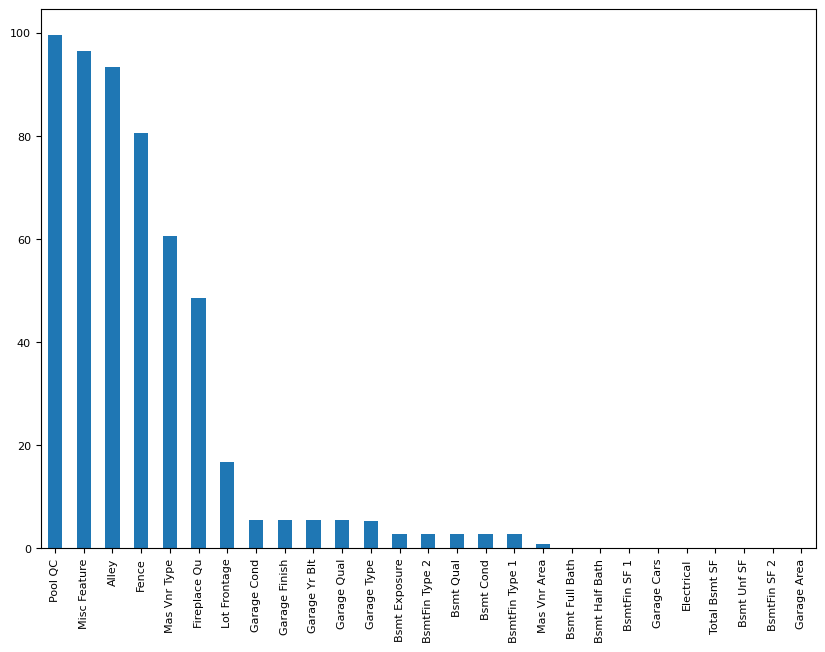

In [10]:
null_per.plot(kind = "bar" , figsize = [10,7] , fontsize = 8);

In [11]:
houses = houses.drop(["Pool QC" , "Misc Feature" , "Alley" , "Fence" , "Mas Vnr Type" , "Fireplace Qu"] , axis = 1)
houses.shape

(2930, 76)

Lot Frontage      16.723549
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Qual        5.426621
Garage Cond        5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Mas Vnr Area       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Garage Area        0.034130
Garage Cars        0.034130
Electrical         0.034130
dtype: float64


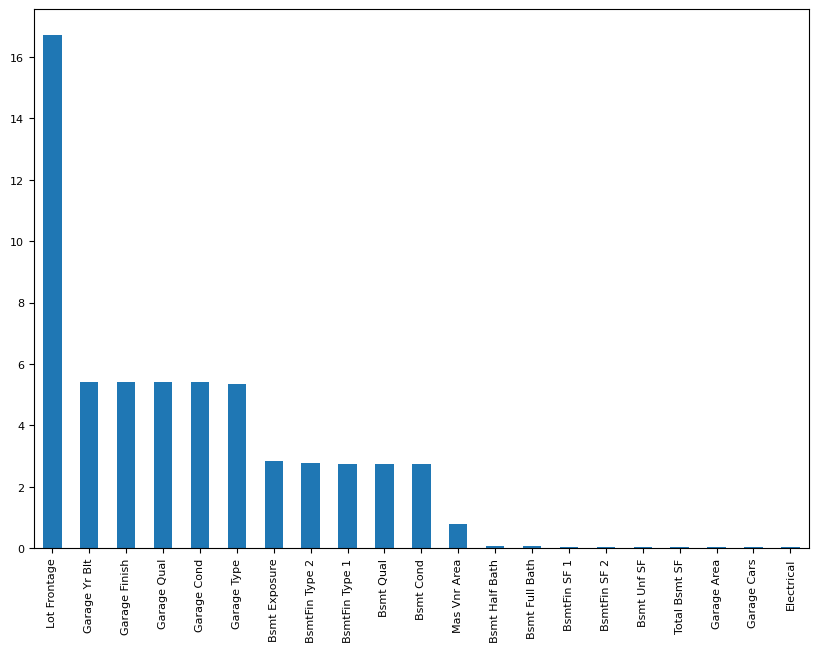

In [12]:
null_values = houses.isnull().sum().sort_values(ascending = False)
null_values = null_values[null_values > 0]

null_per = null_values / houses.shape[0] * 100
print(null_per)

null_per.plot(kind = "bar" , figsize = [10,7] , fontsize = 8);

In [13]:
houses["Lot Frontage"].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [14]:
houses["Lot Frontage"] = houses["Lot Frontage"].fillna(houses["Lot Frontage"].mean())

In [15]:
houses = houses.dropna(axis = 0)

In [16]:
null_values = houses.isnull().sum().sort_values(ascending = False)
null_values = null_values[null_values > 0]
null_values

Series([], dtype: int64)

In [17]:
houses.shape

(2678, 76)

# Correlated Data

In [18]:
numeric = houses.select_dtypes(include = ["int64" , "float64"])
numeric

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.00000,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
2,2,526350040,20,80.00000,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
3,3,526351010,20,81.00000,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
4,4,526353030,20,93.00000,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
5,5,527105010,60,74.00000,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,923251180,20,160.00000,20000,5,7,1960,1996,0.0,...,474,0,0,0,0,0,0,9,2006,131000
2926,2926,923275080,80,37.00000,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2927,2927,923276100,20,69.22459,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2929,2929,924100070,20,77.00000,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


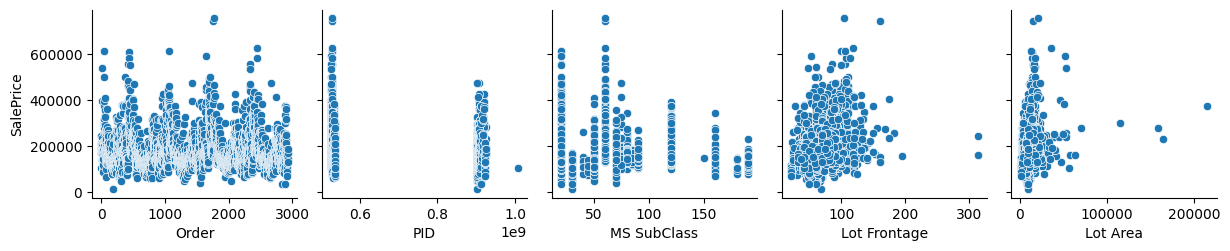

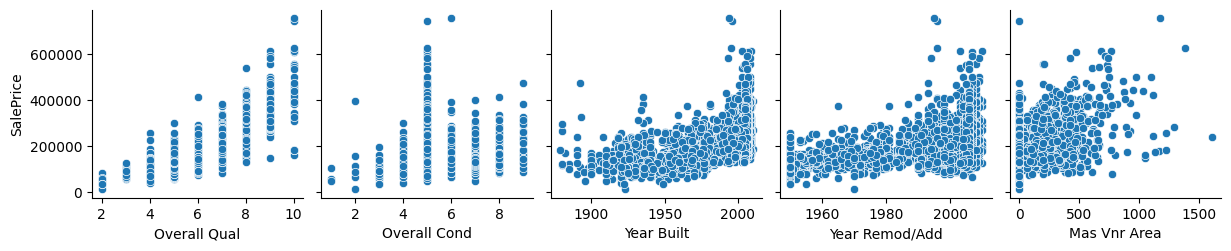

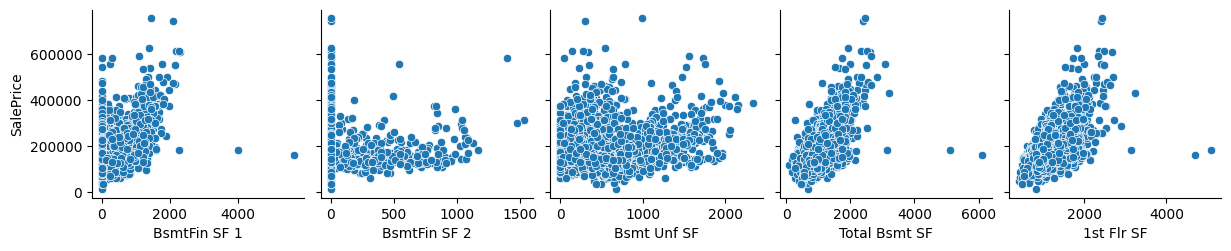

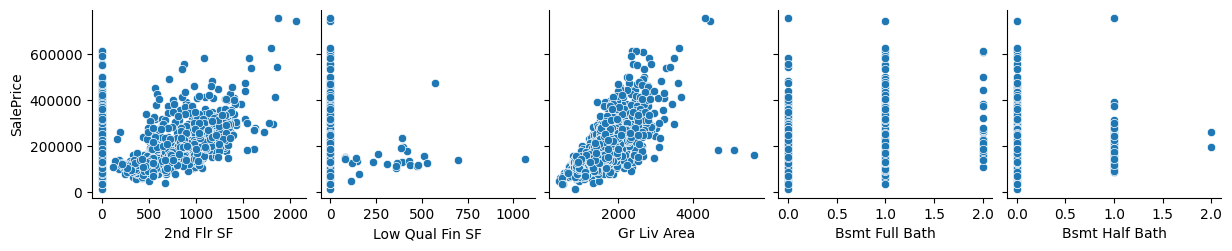

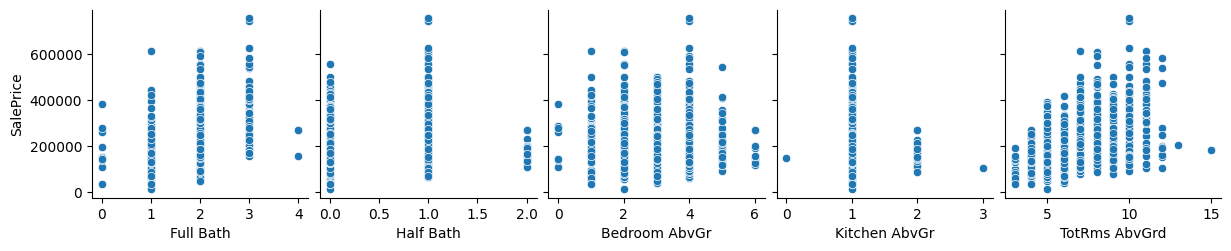

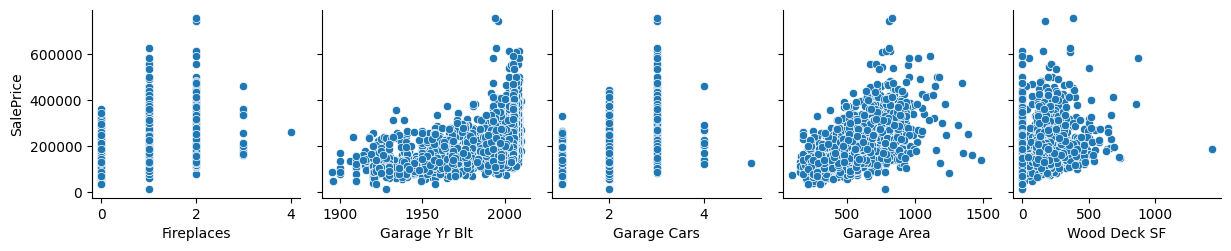

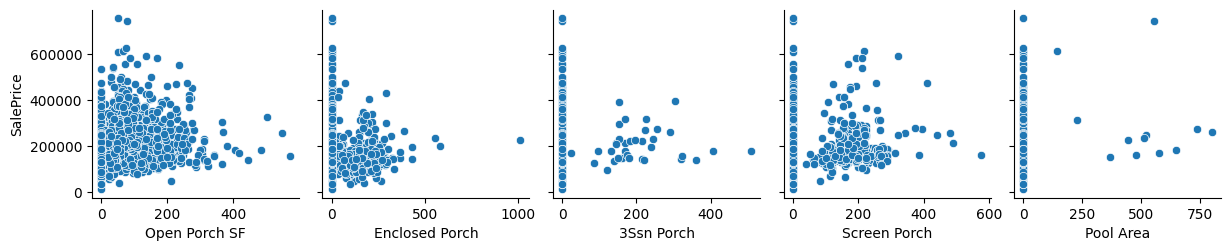

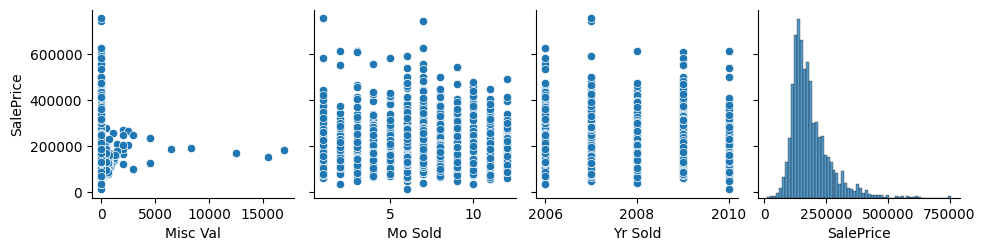

In [19]:
for i in range(0 , len(numeric.columns) , 5):
    sns.pairplot(data = numeric , x_vars = numeric.columns[i:i + 5] , y_vars = ["SalePrice"]);

In [20]:
num_corr = numeric.corr()["SalePrice"].sort_values(ascending = False)
num_corr

SalePrice          1.000000
Overall Qual       0.793249
Gr Liv Area        0.715867
Garage Cars        0.652448
Garage Area        0.633467
1st Flr SF         0.630424
Total Bsmt SF      0.630305
Full Bath          0.555861
Year Built         0.545724
Garage Yr Blt      0.526832
Year Remod/Add     0.525889
TotRms AbvGrd      0.523363
Mas Vnr Area       0.499652
Fireplaces         0.452517
BsmtFin SF 1       0.412925
Lot Frontage       0.346401
Open Porch SF      0.317461
Wood Deck SF       0.309485
Half Bath          0.269085
2nd Flr SF         0.265038
Bsmt Full Bath     0.263045
Lot Area           0.261842
Bsmt Unf SF        0.162408
Bedroom AbvGr      0.149441
Screen Porch       0.105232
Pool Area          0.074451
Mo Sold            0.031479
3Ssn Porch         0.030700
BsmtFin SF 2      -0.013117
Misc Val          -0.014644
Yr Sold           -0.025398
Low Qual Fin SF   -0.028493
Order             -0.031744
Bsmt Half Bath    -0.046883
MS SubClass       -0.073121
Kitchen AbvGr     -0

In [21]:
corr_data = num_corr[abs(num_corr) > 0.4].sort_values(ascending = False)
corr_data

SalePrice         1.000000
Overall Qual      0.793249
Gr Liv Area       0.715867
Garage Cars       0.652448
Garage Area       0.633467
1st Flr SF        0.630424
Total Bsmt SF     0.630305
Full Bath         0.555861
Year Built        0.545724
Garage Yr Blt     0.526832
Year Remod/Add    0.525889
TotRms AbvGrd     0.523363
Mas Vnr Area      0.499652
Fireplaces        0.452517
BsmtFin SF 1      0.412925
Name: SalePrice, dtype: float64

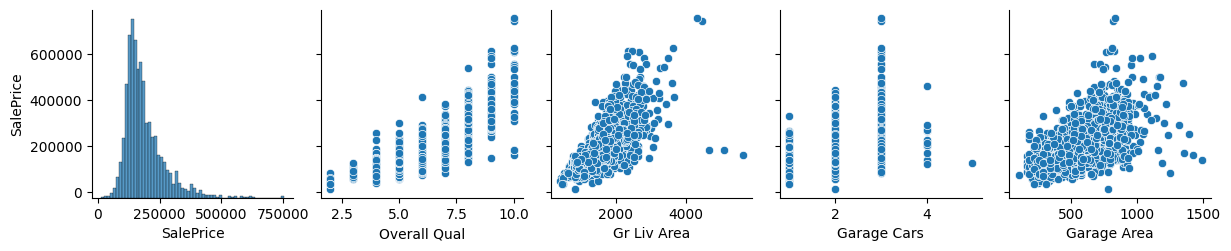

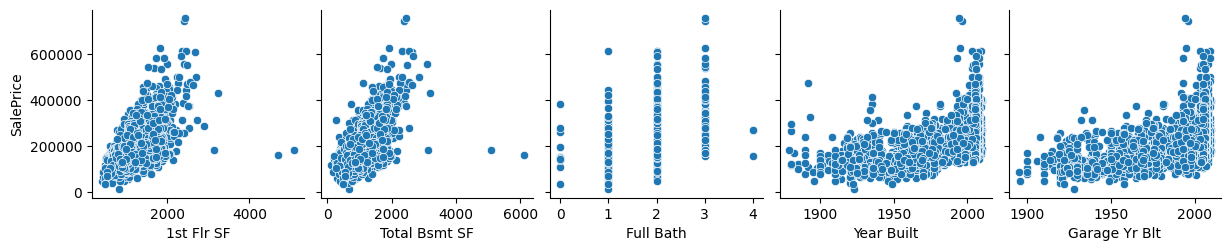

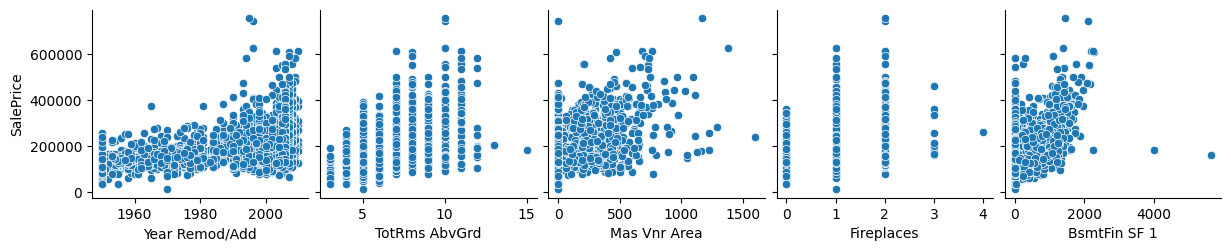

In [22]:
for i in range(0 , len(corr_data.index) , 5):
    sns.pairplot(data = numeric , x_vars = corr_data.index[i:i + 5] , y_vars = ["SalePrice"]);

In [23]:
uncorr_data = num_corr[abs(num_corr) < 0.4].sort_values(ascending = False).index
uncorr_data

Index(['Lot Frontage', 'Open Porch SF', 'Wood Deck SF', 'Half Bath',
       '2nd Flr SF', 'Bsmt Full Bath', 'Lot Area', 'Bsmt Unf SF',
       'Bedroom AbvGr', 'Screen Porch', 'Pool Area', 'Mo Sold', '3Ssn Porch',
       'BsmtFin SF 2', 'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Order',
       'Bsmt Half Bath', 'MS SubClass', 'Kitchen AbvGr', 'Enclosed Porch',
       'Overall Cond', 'PID'],
      dtype='object')

In [24]:
houses = houses.drop(uncorr_data , axis = 1)
houses.shape

(2678, 52)

In [25]:
num = houses.select_dtypes(include = ["int64" , "float64"])

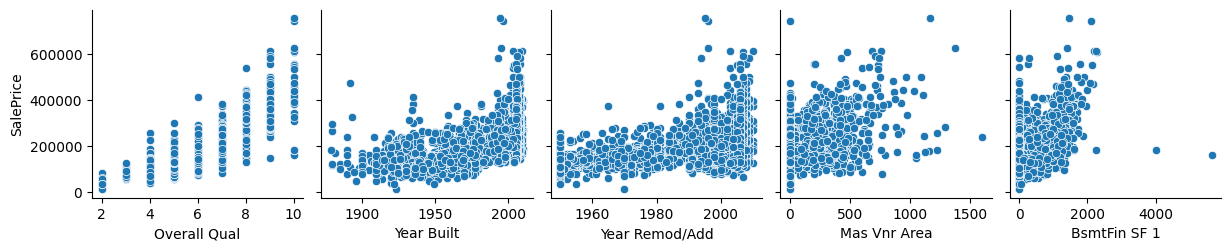

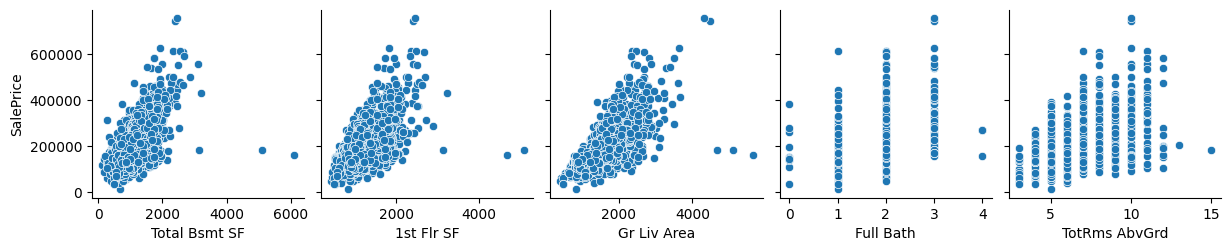

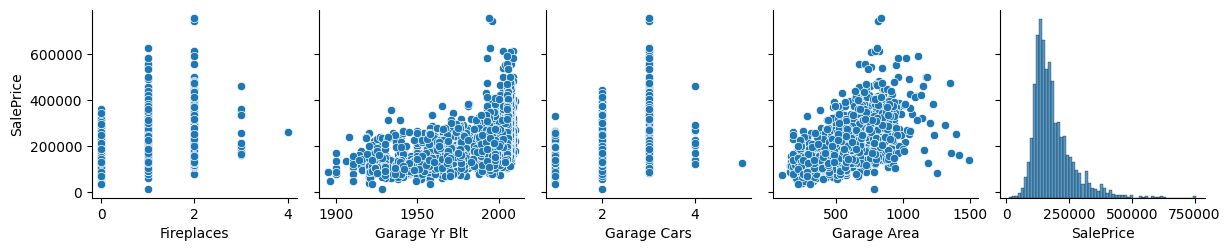

In [26]:
for i in range(0 , len(num.columns) , 5):
    sns.pairplot(data = num , x_vars = num.columns[i:i + 5] , y_vars = ["SalePrice"]);

## Scailng

In [27]:
scaler_features = MinMaxScaler()

houses[num.columns] = scaler_features.fit_transform(houses[num.columns])

houses.head(10)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition,SalePrice
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0.565217,Fin,0.25,0.308357,TA,TA,P,WD,Normal,0.272444
2,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,0.573913,Unf,0.00,0.453890,TA,TA,Y,WD,Normal,0.124238
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0.547826,Unf,0.00,0.152738,TA,TA,Y,WD,Normal,0.214509
4,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0.634783,Fin,0.25,0.304035,TA,TA,Y,WD,Normal,0.311517
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.886957,Fin,0.25,0.275216,TA,TA,Y,WD,Normal,0.238626
6,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.895652,Fin,0.25,0.266571,TA,TA,Y,WD,Normal,0.246171
7,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,0.921739,Fin,0.25,0.347262,TA,TA,Y,WD,Normal,0.270423
8,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,0.843478,RFn,0.25,0.292507,TA,TA,Y,WD,Normal,0.240782
9,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,0.869565,RFn,0.25,0.365994,TA,TA,Y,WD,Normal,0.301412
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.904348,Fin,0.25,0.246398,TA,TA,Y,WD,Normal,0.237414


# Model Build

In [28]:
houses.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition,SalePrice
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0.565217,Fin,0.25,0.308357,TA,TA,P,WD,Normal,0.272444
2,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,0.573913,Unf,0.00,0.453890,TA,TA,Y,WD,Normal,0.124238
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0.547826,Unf,0.00,0.152738,TA,TA,Y,WD,Normal,0.214509
4,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,0.634783,Fin,0.25,0.304035,TA,TA,Y,WD,Normal,0.311517
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.886957,Fin,0.25,0.275216,TA,TA,Y,WD,Normal,0.238626


In [29]:
houses_coded = pd.get_dummies(houses , dtype='int')

In [30]:
houses_coded.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.500,0.618321,0.166667,0.0700,0.113218,0.162365,0.266425,0.238586,0.25,0.333333,...,0,0,0,1,0,0,0,0,1,0
2,0.375,0.625954,0.183333,0.0000,0.082920,0.129392,0.104309,0.093410,0.25,0.166667,...,0,0,0,1,0,0,0,0,1,0
3,0.500,0.603053,0.133333,0.0675,0.163536,0.203830,0.196672,0.176122,0.25,0.250000,...,0,0,0,1,0,0,0,0,1,0
4,0.625,0.679389,0.300000,0.0000,0.188696,0.333888,0.363268,0.325310,0.50,0.416667,...,0,0,0,1,0,0,0,0,1,0
5,0.375,0.900763,0.800000,0.0000,0.140149,0.137052,0.111135,0.233429,0.50,0.250000,...,0,0,0,1,0,0,0,0,1,0


## Data Spliting

In [31]:
y = houses_coded["SalePrice"]
X = houses_coded.drop(["SalePrice"] , axis = 1)

print(y)
X.head()

0       0.272444
2       0.124238
3       0.214509
4       0.311517
5       0.238626
          ...   
2925    0.159269
2926    0.174763
2927    0.159269
2929    0.211814
2930    0.236066
Name: SalePrice, Length: 2678, dtype: float64


,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.500,0.618321,0.166667,0.0700,0.113218,0.162365,0.266425,0.238586,0.25,0.333333,...,0,0,0,1,0,0,0,0,1,0
2,0.375,0.625954,0.183333,0.0000,0.082920,0.129392,0.104309,0.093410,0.25,0.166667,...,0,0,0,1,0,0,0,0,1,0
3,0.500,0.603053,0.133333,0.0675,0.163536,0.203830,0.196672,0.176122,0.25,0.250000,...,0,0,0,1,0,0,0,0,1,0
4,0.625,0.679389,0.300000,0.0000,0.188696,0.333888,0.363268,0.325310,0.50,0.416667,...,0,0,0,1,0,0,0,0,1,0
5,0.375,0.900763,0.800000,0.0000,0.140149,0.137052,0.111135,0.233429,0.50,0.250000,...,0,0,0,1,0,0,0,0,1,0


In [32]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

## Preformance Metrics

In [33]:
from sklearn.metrics import r2_score

def performance(y_true , y_predict):
    score = r2_score(y_true , y_predict)
    
    return score

## Learning Curves

In [34]:
from sklearn.model_selection import learning_curve 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import ShuffleSplit, train_test_split

def draw_learning_curves(X, y, estimator, num_trainings):
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv1, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings),scoring = 'r2')
    
    print("train size :\n",train_sizes)
    print()
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    print("train score mean:\n",train_scores_mean)
    print()
    #train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_std = np.std(test_scores, axis=1)

    plt.grid();

    plt.title("Learning Curves");
    plt.xlabel("Training examples");
    plt.ylabel("Score");

    plt.plot(train_sizes,train_scores_mean, 'o-', color="g",
             label="Training score");
    plt.plot(train_sizes,test_scores_mean, 'o-', color="y",
             label="Cross-validation score");
    plt.legend(loc="best");

train size :
 [ 214  428  642  856 1071 1285 1499 1713 1927 2142]

[[0.39494157 0.52310359 0.50145099 0.43111725 0.50242649 0.53830872
  0.56395403 0.50811294 0.46428216 0.52220201]
 [0.3734829  0.45620587 0.48302014 0.41668951 0.5005243  0.47565531
  0.50068472 0.42648954 0.47557275 0.54291444]
 [0.43684673 0.45623702 0.48569769 0.44068719 0.50375519 0.47909775
  0.47986169 0.44215355 0.47388231 0.49950752]
 [0.46916077 0.46898852 0.49852488 0.45044097 0.50102508 0.50376516
  0.47782221 0.44946353 0.47399456 0.48826123]
 [0.44571311 0.46822021 0.47867724 0.45513699 0.47969588 0.47752787
  0.4698148  0.46906805 0.46722221 0.47328864]
 [0.45052189 0.47191333 0.4808543  0.4611911  0.47791834 0.46085186
  0.4731636  0.47756383 0.48279418 0.48534962]
 [0.45581564 0.46700254 0.48578659 0.47239655 0.48782259 0.47460852
  0.4809588  0.46123951 0.48272683 0.49232756]
 [0.46705521 0.47457871 0.48087286 0.46768788 0.48605539 0.47933049
  0.47554334 0.47390262 0.47934033 0.48504133]
 [0.4706507  

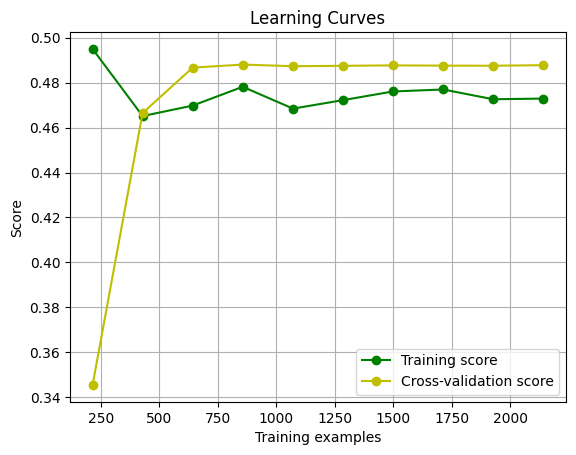

In [35]:
#estimator maxdepth=1
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=1,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 214  428  642  856 1071 1285 1499 1713 1927 2142]

[[0.83034147 0.8428094  0.84533772 0.82279824 0.81397305 0.86451017
  0.86392192 0.82965643 0.78696955 0.79091052]
 [0.72355541 0.76335192 0.78730372 0.77811293 0.78828979 0.79878686
  0.79632702 0.84471857 0.78619633 0.79481778]
 [0.74515564 0.76122237 0.76266817 0.76123785 0.78169151 0.77165459
  0.74969721 0.80648103 0.79240548 0.78199392]
 [0.76312755 0.76572807 0.7564519  0.75119395 0.77838577 0.77382687
  0.75406475 0.78242671 0.75764952 0.75640717]
 [0.7403465  0.74972674 0.75734636 0.76068231 0.76297294 0.76666531
  0.74189044 0.77926173 0.74188258 0.74536968]
 [0.73641783 0.73824579 0.76182099 0.75758425 0.76063605 0.76207287
  0.73454222 0.77857687 0.75700464 0.75456429]
 [0.73275185 0.73414826 0.75776959 0.75004066 0.75766359 0.76075378
  0.74274419 0.76022862 0.75925657 0.75358575]
 [0.7324995  0.73953161 0.73463252 0.73969379 0.75396532 0.75592666
  0.73333492 0.75265654 0.75580186 0.75369018]
 [0.73658018 

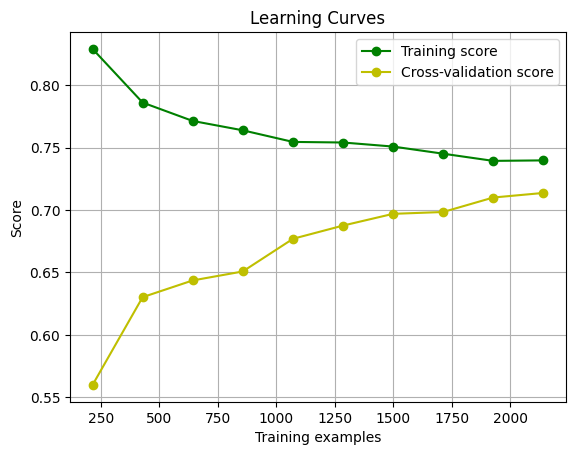

In [36]:
#estimator maxdepth=3
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=3,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 214  428  642  856 1071 1285 1499 1713 1927 2142]

[[0.88483908 0.909857   0.92124365 0.89354918 0.88742965 0.9212886
  0.92150085 0.8949482  0.87430157 0.87188233]
 [0.85795819 0.85764237 0.87093838 0.86055878 0.86469213 0.86978549
  0.87426096 0.89497421 0.87408065 0.87230346]
 [0.8216563  0.82790755 0.83455619 0.83107332 0.85006166 0.84290941
  0.82844993 0.87352267 0.87479875 0.86230199]
 [0.83495052 0.83420687 0.82612392 0.82036815 0.84420921 0.83502373
  0.82361641 0.87093997 0.83445253 0.83476142]
 [0.8265055  0.81889008 0.82343228 0.82020434 0.83150482 0.82864633
  0.81742982 0.85680908 0.83528897 0.82472486]
 [0.8181749  0.80387178 0.83127642 0.82405279 0.82770019 0.83012703
  0.81227121 0.84528375 0.82876615 0.81908734]
 [0.81684406 0.80634904 0.82787319 0.82797565 0.82144805 0.82795132
  0.81442907 0.82541395 0.83030019 0.81701487]
 [0.81139091 0.80766548 0.81404538 0.8187062  0.81683879 0.82805324
  0.80920453 0.81245598 0.82203876 0.82296199]
 [0.81357035 0

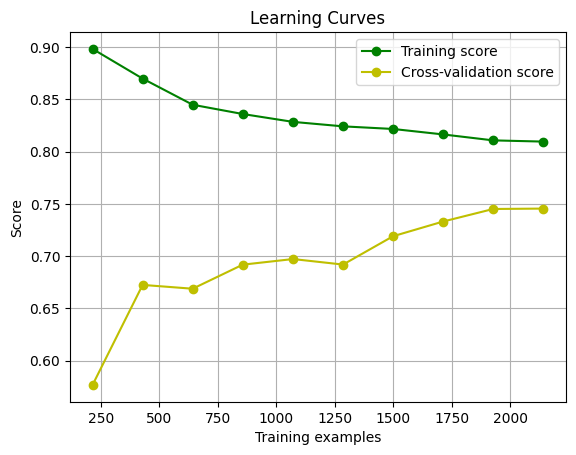

In [37]:
#estimator maxdepth=4
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=4,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 214  428  642  856 1071 1285 1499 1713 1927 2142]

[[0.93011625 0.95057425 0.95962392 0.93882059 0.92574546 0.95078164
  0.96180666 0.93378109 0.93669748 0.91629279]
 [0.90727862 0.91581011 0.92091411 0.91570018 0.90884189 0.91842064
  0.91881815 0.93236508 0.92843607 0.91988358]
 [0.88777329 0.88658019 0.88536693 0.88920014 0.89901864 0.89298632
  0.88546309 0.91461771 0.92504083 0.91193908]
 [0.88950134 0.8870439  0.88020932 0.8736005  0.88745354 0.89010536
  0.8948377  0.90695203 0.89288257 0.88750811]
 [0.88222841 0.87082331 0.87711378 0.86543683 0.88171296 0.88550294
  0.87729487 0.89863781 0.89718762 0.88014761]
 [0.87271618 0.85310681 0.88242534 0.86970501 0.88195205 0.88586912
  0.86799078 0.89089363 0.88669076 0.8703086 ]
 [0.86762613 0.86385909 0.88268665 0.87268174 0.87344946 0.88073209
  0.8682573  0.87110591 0.88443561 0.86781445]
 [0.86453649 0.86384061 0.87250012 0.87101148 0.86643516 0.87666833
  0.86711016 0.87267201 0.87305541 0.86897286]
 [0.85989534 

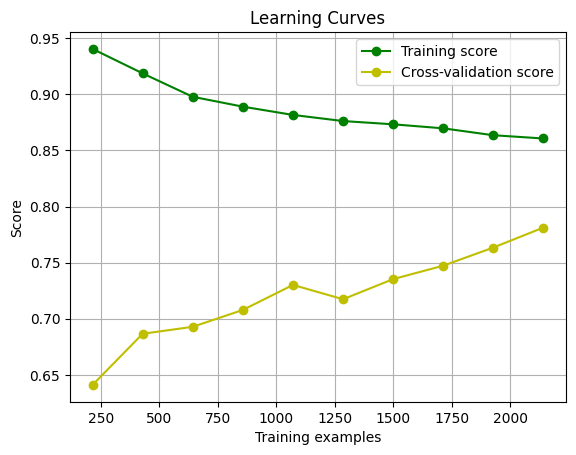

In [38]:
#estimator maxdepth=5
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=5,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 214  428  642  856 1071 1285 1499 1713 1927 2142]

[[0.96290224 0.97084567 0.98014084 0.96417149 0.95703103 0.96482087
  0.98138031 0.95621439 0.96567658 0.94997092]
 [0.93833586 0.95512822 0.95292895 0.94754476 0.94287264 0.94922174
  0.95173152 0.95565475 0.96180909 0.9476842 ]
 [0.92772051 0.92580647 0.9291891  0.93772178 0.93364531 0.92643263
  0.92203334 0.94293401 0.95091765 0.94661427]
 [0.92338144 0.92179799 0.92178531 0.91375716 0.92345149 0.92512087
  0.93194295 0.93630447 0.93180023 0.92479683]
 [0.91890994 0.90468138 0.9158713  0.90669018 0.91904201 0.92155107
  0.91593125 0.9301914  0.93344658 0.91280885]
 [0.91040362 0.90317638 0.91922528 0.91008995 0.91669957 0.9192505
  0.91193475 0.92252199 0.92105703 0.90863856]
 [0.90326143 0.90270835 0.91997314 0.90775155 0.90816588 0.91451046
  0.90836535 0.90811987 0.91724194 0.90936059]
 [0.90092833 0.90030948 0.91329707 0.90844133 0.8986143  0.91187574
  0.90745343 0.90913793 0.91082523 0.90712758]
 [0.8959     0

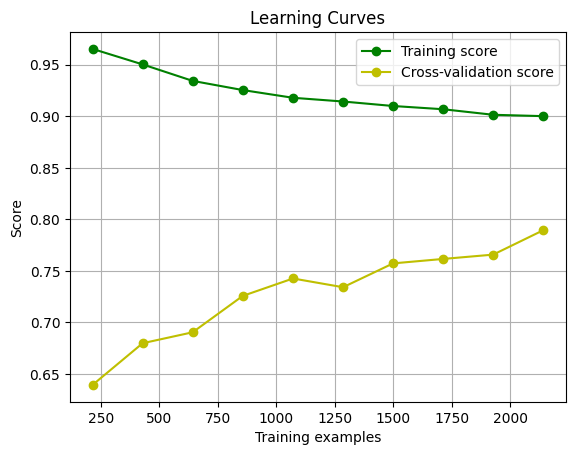

In [39]:
#estimator maxdepth=6
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=6,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 214  428  642  856 1071 1285 1499 1713 1927 2142]

[[0.99768629 0.99847627 0.99811686 0.99588785 0.99814968 0.99492272
  0.99951268 0.99780675 0.99854657 0.99593615]
 [0.99400312 0.99299726 0.99699312 0.99406159 0.99547571 0.99299277
  0.99741481 0.99304438 0.99508675 0.99538286]
 [0.98931388 0.98999444 0.99104281 0.99660145 0.99095624 0.98785193
  0.99170739 0.99298551 0.99204731 0.99512287]
 [0.98892411 0.985175   0.99054109 0.98484087 0.98560652 0.98797365
  0.99023446 0.98986367 0.98832879 0.99047269]
 [0.9864512  0.98429047 0.98850669 0.98585636 0.98533413 0.98584538
  0.98065559 0.98957014 0.99040316 0.98436886]
 [0.98130355 0.98550129 0.98629536 0.98299946 0.98291783 0.98453194
  0.98420505 0.98871282 0.98530342 0.98180462]
 [0.97994465 0.97935779 0.98607185 0.98229189 0.98264967 0.98526679
  0.98604266 0.98429154 0.98148055 0.98451471]
 [0.97486398 0.97963812 0.9839029  0.9808293  0.97882689 0.98329221
  0.98401838 0.98412304 0.98100003 0.98046158]
 [0.97333016 

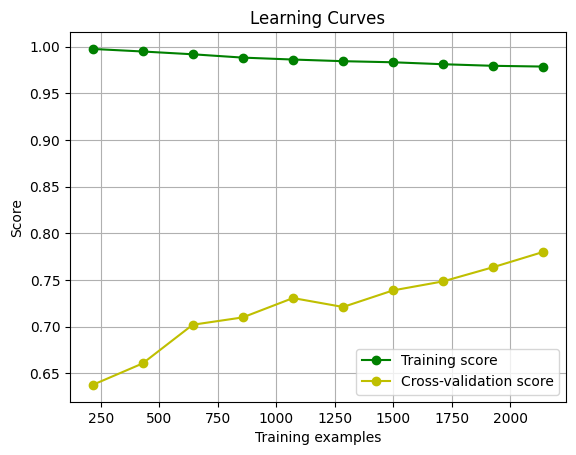

In [40]:
#estimator maxdepth=10
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=10,random_state=0)
draw_learning_curves(X, y, estimator, 10);

## Complexity

In [41]:
import sklearn.model_selection as curves
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    
    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv1, scoring = 'r2')
    #print("train_scores =\n",train_scores)
    #print("test_scores =\n",test_scores)
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(5, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    
    
    # Visual aesthetics
    plt.legend(loc = 'best')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
   


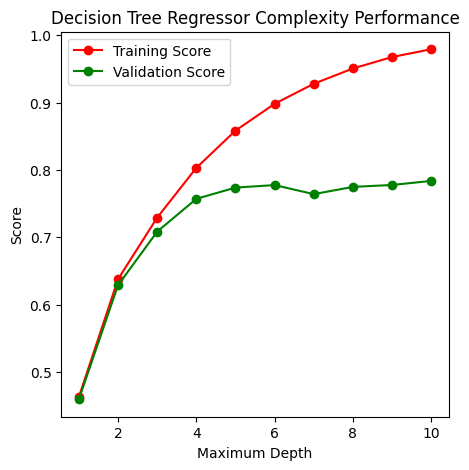

In [42]:
ModelComplexity(X_train, y_train)

## GridSearch

In [43]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X , y):
    
    cv_sets = ShuffleSplit(n_splits = 5 , random_state = 0 , test_size = 0.2 , train_size = None)
    
    regressor = DecisionTreeRegressor(random_state=0)

    params = {"max_depth" : [2,4,6,7,8,9,10,11,12,13,14,16] , 'min_samples_leaf':[8,9,10,11,12,13,14,15,16],'min_samples_split':[2,3,4,6,8,10,12,14,16]}
    
    scoring = make_scorer(performance)
    
    grid = GridSearchCV(estimator=regressor, param_grid= params, scoring=scoring,cv=cv_sets)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [44]:
reg = fit_model(X_train , y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(reg.get_params()['min_samples_leaf']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(reg.get_params()['min_samples_split']))

Parameter 'max_depth' is 11 for the optimal model.
Parameter 'min_samples_leaf' is 14 for the optimal model.
Parameter 'min_samples_split' is 2 for the optimal model.


In [45]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=14, random_state=0)

In [46]:
train_predict = reg.predict(X_train)
test_predict = reg.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

The Train Score Is :  0.8818199050373996
The Test Score Is :  0.870991760878361
